187


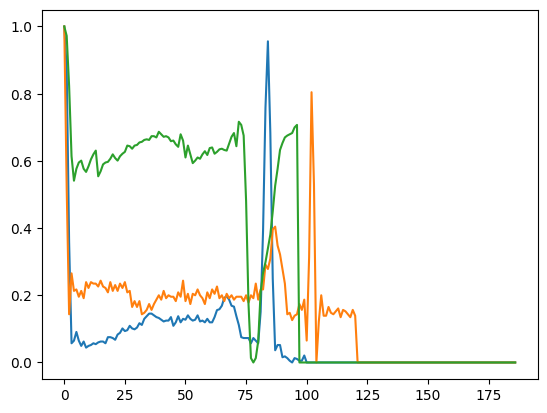

In [3]:
import os
import matplotlib.pyplot as plt 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 
import tensorflow as tf 
num_clients=8
initial='clients'
client_names = ['{}_{}'.format(initial, i+1) for i in range(num_clients)] 
import pandas as pd
from tensorflow.keras.utils import to_categorical 

train_data=pd.read_csv('Dataset/mitbih_train.csv',header=None)
test_data=pd.read_csv('Dataset/mitbih_test.csv',header=None)
target_train=train_data.iloc[:,-1]
target_test=test_data.iloc[:,-1]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)

x_train=train_data.iloc[:,:-1].values
x_test=test_data.iloc[:,:-1].values 

plt.plot(x_train[16]) 
plt.plot(x_train[14326]) 
plt.plot(x_train[16586]) 
print(len(x_train[16]))

In [12]:
print((X.shape()))

AttributeError: 'tuple' object has no attribute 'shape'

In [15]:
def create_local_learner(data_list, label_list, num_clients=8, initial='clients'):
     #create a list of client names
    client_names = ['{}_{}'.format(initial, i+1) for i in range(num_clients)]
    #randomize the data
    data = list(zip(data_list, label_list))
    random.shuffle(data)  
    #shard data and place at each client
    size = len(data)//num_clients
    shards = [data[i:i + size] for i in range(0, size*num_clients, size)]
    assert(len(shards) == len(client_names))
    
    return {client_names[i] : shards[i] for i in range(len(client_names))} 

In [24]:
import random
def batch_data(data_shard, bs=32):
    #seperate shard into data and labels lists
    data, label = zip(*data_shard)
    dataset = tf.data.Dataset.from_tensor_slices((list(data), list(label)))
    return dataset.shuffle(len(label)).batch(bs)

clients = create_local_learner(x_train, y_train, num_clients=10, initial='client')
print("Length",len(clients))
#process and batch the training data for each client
clients_batched = dict()
for (client_name, data) in clients.items():
    clients_batched[client_name] = batch_data(data) 
#process and batch the test set  
test_batched = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(len(y_test))

Length 10


KeyError: 'clients_1'

In [3]:
with open('Dataset/00001_lr.dat', 'rb') as file:
    contents = file.read()
print(contents)

import matplotlib.pyplot as plt

# Sample binary heartbeat data (replace this with your own data)
heartbeat_data = contents
time_axis = range(len(heartbeat_data))
plt.figure(figsize=(10, 4))  # Adjust the figure size as needed
plt.plot(time_axis, heartbeat_data, marker='o', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Heartbeat (1: Beat, 0: No Beat)')
plt.title('Binary Heartbeat Data')

# Show the plot
plt.grid(True)
plt.show()


b'\x89\xff\xc9\xff@\x00V\x00\xa5\xff\x04\x00\xbb\xff\xe1\xff\x00\x00\xe6\xff\xd9\xff\xb1\xff\x8c\xff\xcd\xffA\x00S\x00\xa6\xff\x06\x00\xc0\xff\xdc\xff\xfd\xff\xe1\xff\xde\xff\xb6\xff\x88\xff\xd4\xffL\x00R\x00\x9e\xff\x10\x00\xc6\xff\xde\xff\xf6\xff\xe4\xff\xe3\xff\xbb\xff\x8b\xff\xda\xffP\x00M\x00\x9e\xff\x15\x00\xce\xff\xe2\xff\xf1\xff\xe9\xff\xea\xff\xc0\xff\x99\xff\xe1\xffH\x00B\x00\xa9\xff\x15\x00\xd3\xff\xe5\xff\xec\xff\xed\xff\xee\xff\xc6\xff\x9f\xff\xe7\xffG\x00=\x00\xac\xff\x17\x00\xdc\xff\xe7\xff\xf7\xff\xf2\xff\xf4\xff\xcc\xff\x89\xff\xf2\xffj\x00B\x00\x90\xff.\x00\xe3\xff\xf4\xff\x05\x00\xf8\xff\xf9\xff\xd0\xff\xa0\xff\x08\x00h\x00,\x00\x9c\xff8\x00\xe9\xff\x03\x00\x12\x00\x02\x00\xff\xff\xd7\xff\xd0\xff,\x00\\\x00\x02\x00\xba\xffD\x00\xf1\xff\x12\x00\x15\x00\t\x00\x05\x00\xda\xff\xdb\xff-\x00Q\x00\xfc\xff\xc5\xff?\x00\xce\xff\t\x00\x12\x00\x16\x00\t\x00\xdf\xff\xe0\xff"\x00B\x00\xff\xff\xce\xff2\x00\xb5\xff\x07\x00*\x00*\x00\x1c\x00\xe3\xff\xfe\xffN\x00P\x00\xda\xff\xd6\xff

ValueError: x and y must have same first dimension, but have shapes (24000,) and (1,)

Error in callback <function _draw_all_if_interactive at 0x000001F36E0D93F0> (for post_execute):


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte

<Figure size 1000x400 with 1 Axes>